# Description

## 💳 Project: Predicting Credit Card Default

This project is aimed at **predicting customer default payments** on credit cards in Taiwan.

From a **risk management** perspective, the objective is to build a model that can estimate the **probability of default** for each customer. This estimated probability is often more valuable than a simple binary classification (default/no default), as it allows for better-informed, continuous risk-based decisions, such as setting credit limits or determining interest rates.

The **Kolmogorov-Smirnov (K-S) chart** will be used as a key metric to evaluate the model, specifically to assess its ability to differentiate between the cumulative distribution of estimated default probabilities for the customers who actually defaulted versus those who did not.

---

## 📊 Data Description

The dataset includes **23 explanatory variables (features)** and **one binary response variable** indicating whether a customer defaulted on their next payment.

| Variable | Type | Description |
| :--- | :--- | :--- |
| **Response Variable** | Binary | **`default payment next month`** (Yes = 1, No = 0) |
| **LIMIT_BAL** | Continuous | **Amount of given credit** (NT dollar). Includes both individual and family (supplementary) credit. |
| **SEX** | Categorical | **Gender** (1 = male; 2 = female). |
| **EDUCATION** | Categorical | **Education** (1 = graduate school; 2 = university; 3 = high school; 4 = others). |
| **MARRIAGE** | Categorical | **Marital status** (1 = married; 2 = single; 3 = others). |
| **AGE** | Continuous | **Age** (year). |

### Past Payment History (Categorical / Ordinal)

Variables **PAY_0** through **PAY_6** represent the **repayment status** over six months, from September 2005 down to April 2005, respectively.

| Variable | Timeframe |
| :--- | :--- |
| **PAY_0** | Repayment status in **September, 2005** |
| **PAY_2** | Repayment status in **August, 2005** |
| **PAY_3** | Repayment status in **July, 2005** |
| **PAY_4** | Repayment status in **June, 2005** |
| **PAY_5** | Repayment status in **May, 2005** |
| **PAY_6** | Repayment status in **April, 2005** |

**Measurement Scale for Repayment Status:**
* **-1**: Pay duly
* **1**: Payment delay for one month
* **2**: Payment delay for two months
* **...**
* **8**: Payment delay for eight months
* **9**: Payment delay for nine months and above

### Bill Statement Amounts (Continuous)

Variables **BILL_AMT1** through **BILL_AMT6** represent the **amount of bill statement** (NT dollar) over six months, from September 2005 down to April 2005, respectively.

| Variable | Timeframe |
| :--- | :--- |
| **BILL_AMT1** | Bill statement amount in **September, 2005** |
| **BILL_AMT2** | Bill statement amount in **August, 2005** |
| **BILL_AMT3** | Bill statement amount in **July, 2005** |
| **BILL_AMT4** | Bill statement amount in **June, 2005** |
| **BILL_AMT5** | Bill statement amount in **May, 2005** |
| **BILL_AMT6** | Bill statement amount in **April, 2005** |

### Previous Payment Amounts (Continuous)

Variables **PAY_AMT1** through **PAY_AMT6** represent the **amount of previous payment** (NT dollar) made over six months, from September 2005 down to April 2005, respectively.

| Variable | Timeframe |
| :--- | :--- |
| **PAY_AMT1** | Amount paid in **September, 2005** |
| **PAY_AMT2** | Amount paid in **August, 2005** |
| **PAY_AMT3** | Amount paid in **July, 2005** |
| **PAY_AMT4** | Amount paid in **June, 2005** |
| **PAY_AMT5** | Amount paid in **May, 2005** |
| **PAY_AMT6** | Amount paid in **April, 2005** |

# Data Description

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_real = pd.read_csv(r"C:\Users\Akshat\Desktop\Deep_learning\CCD\Dataset\UCI_Credit_Card.csv")

In [3]:
df_real = df_real.drop("ID",axis=1)

In [4]:
df = df_real.copy()

In [5]:
df.shape

(30000, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


# Handling duplicate work

In [8]:
len(df[df.duplicated()])

35

In [9]:
df = df.drop_duplicates()

In [10]:
len(df[df.duplicated()])

0

In [11]:
df.shape

(29965, 24)

# Handling Null

In [12]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

<Axes: >

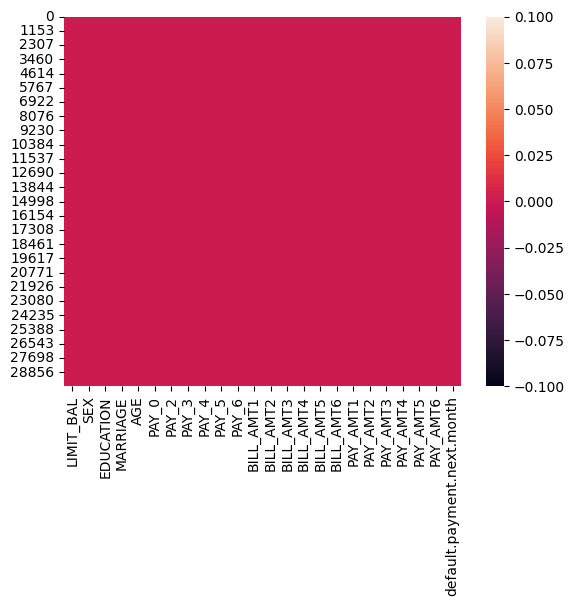

In [13]:
sns.heatmap(df.isnull())

# Data Processing

In [14]:
#renaming of columns for data preprocessing 
df.rename(columns={'default.payment.next.month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [15]:
df.head().T

,0,1,2,3,4
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0
SEX,2.0,2.0,2.0,2.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0
AGE,24.0,26.0,34.0,37.0,57.0
PAY_SEPT,2.0,-1.0,0.0,0.0,-1.0
PAY_AUG,2.0,2.0,0.0,0.0,0.0
PAY_JUL,-1.0,0.0,0.0,0.0,-1.0
PAY_JUN,-1.0,0.0,0.0,0.0,0.0
PAY_MAY,-2.0,0.0,0.0,0.0,0.0


In [16]:
#replacing values with labels easy to understand data in visuals

df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

# EDA

## Dependent variable:

### Is Defaulter

In [17]:
df["IsDefaulter"].value_counts()

IsDefaulter
No     23335
Yes     6630
Name: count, dtype: int64

C:\Users\Akshat\AppData\Local\Temp\ipykernel_13468\3780546660.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'IsDefaulter',data = df,palette='coolwarm')


<Axes: xlabel='IsDefaulter', ylabel='count'>

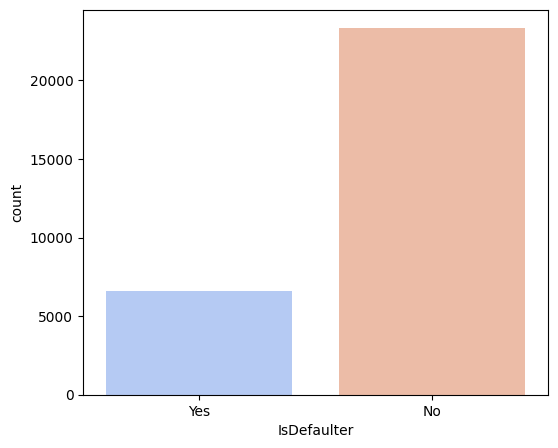

In [18]:
plt.figure(figsize=(6,5))
sns.countplot(x = 'IsDefaulter',data = df,palette='coolwarm')

## Independent Variable

### Categorical Feature

#### SEX

In [19]:
df["SEX"].value_counts()

SEX
Female    18091
Male      11874
Name: count, dtype: int64

C:\Users\Akshat\AppData\Local\Temp\ipykernel_13468\1440832121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "SEX",ax = axes[0],data = df,palette = "coolwarm")


<Axes: xlabel='SEX', ylabel='count'>

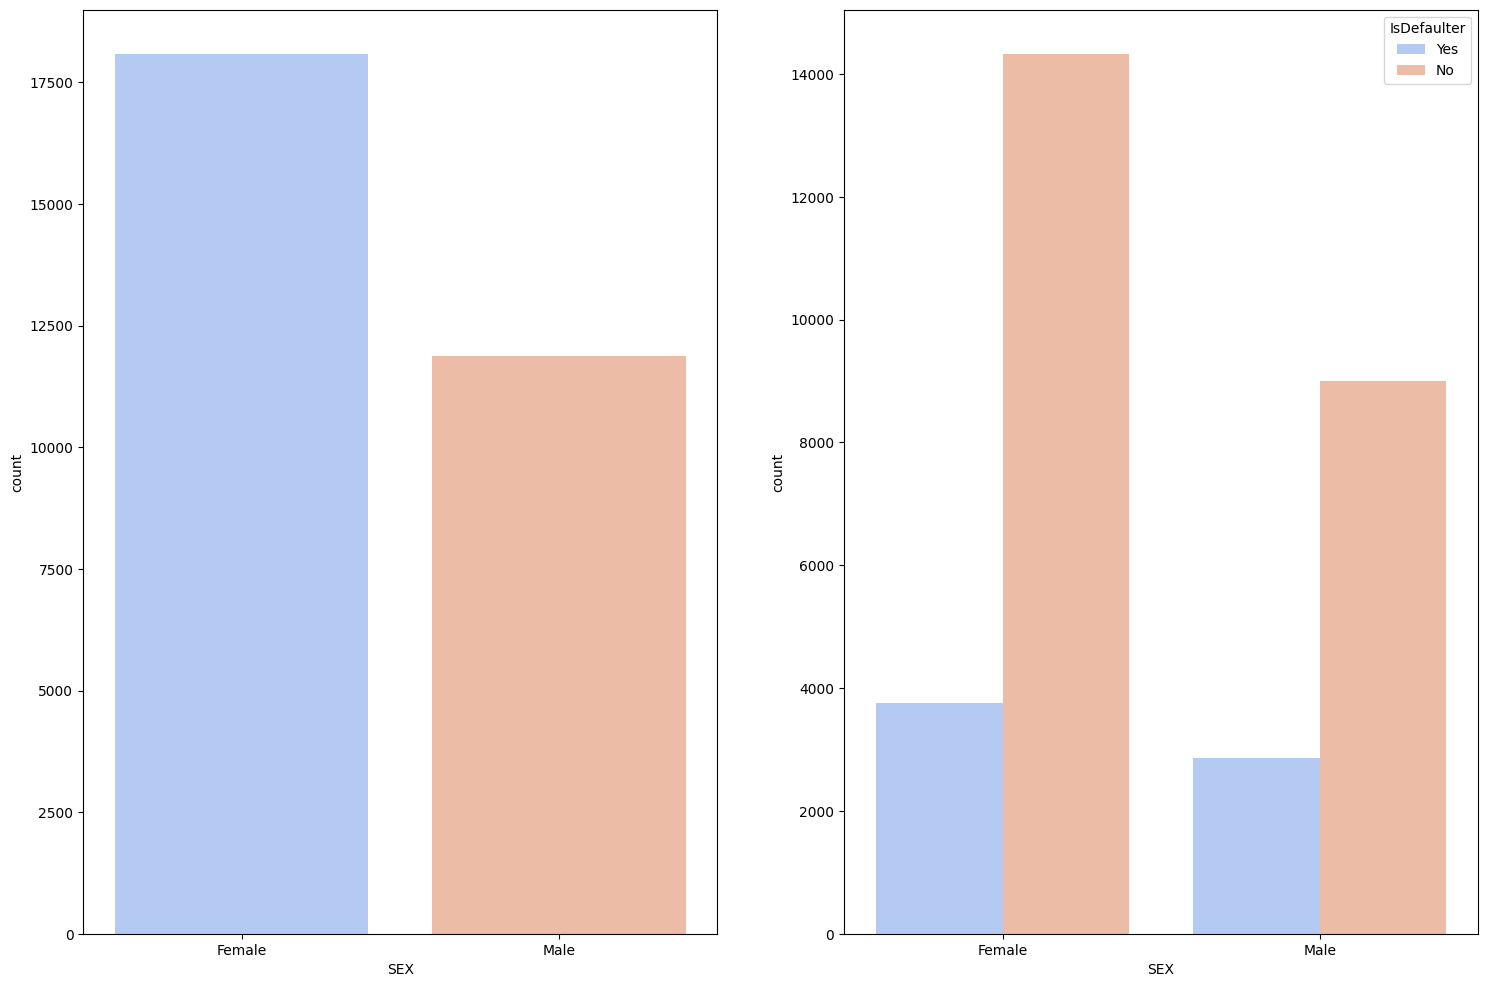

In [20]:
fig,axes = plt.subplots(ncols=2,figsize=(18,12))
sns.countplot(x = "SEX",ax = axes[0],data = df,palette = "coolwarm")
sns.countplot(x= "SEX",ax = axes[1],data =df,palette = "coolwarm",hue = "IsDefaulter")

#### EDUCATION
 (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)


In [21]:
df["EDUCATION"].value_counts()
df["EDUCATION"]=df["EDUCATION"].replace({5:"Others",6:"Others",0:"Others"})
df["EDUCATION"].value_counts()
# Replace unknown values of 0,5,6 with Others because they are less in value

EDUCATION
University         14019
Graduate School    10563
High School         4915
Others               468
Name: count, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='count'>

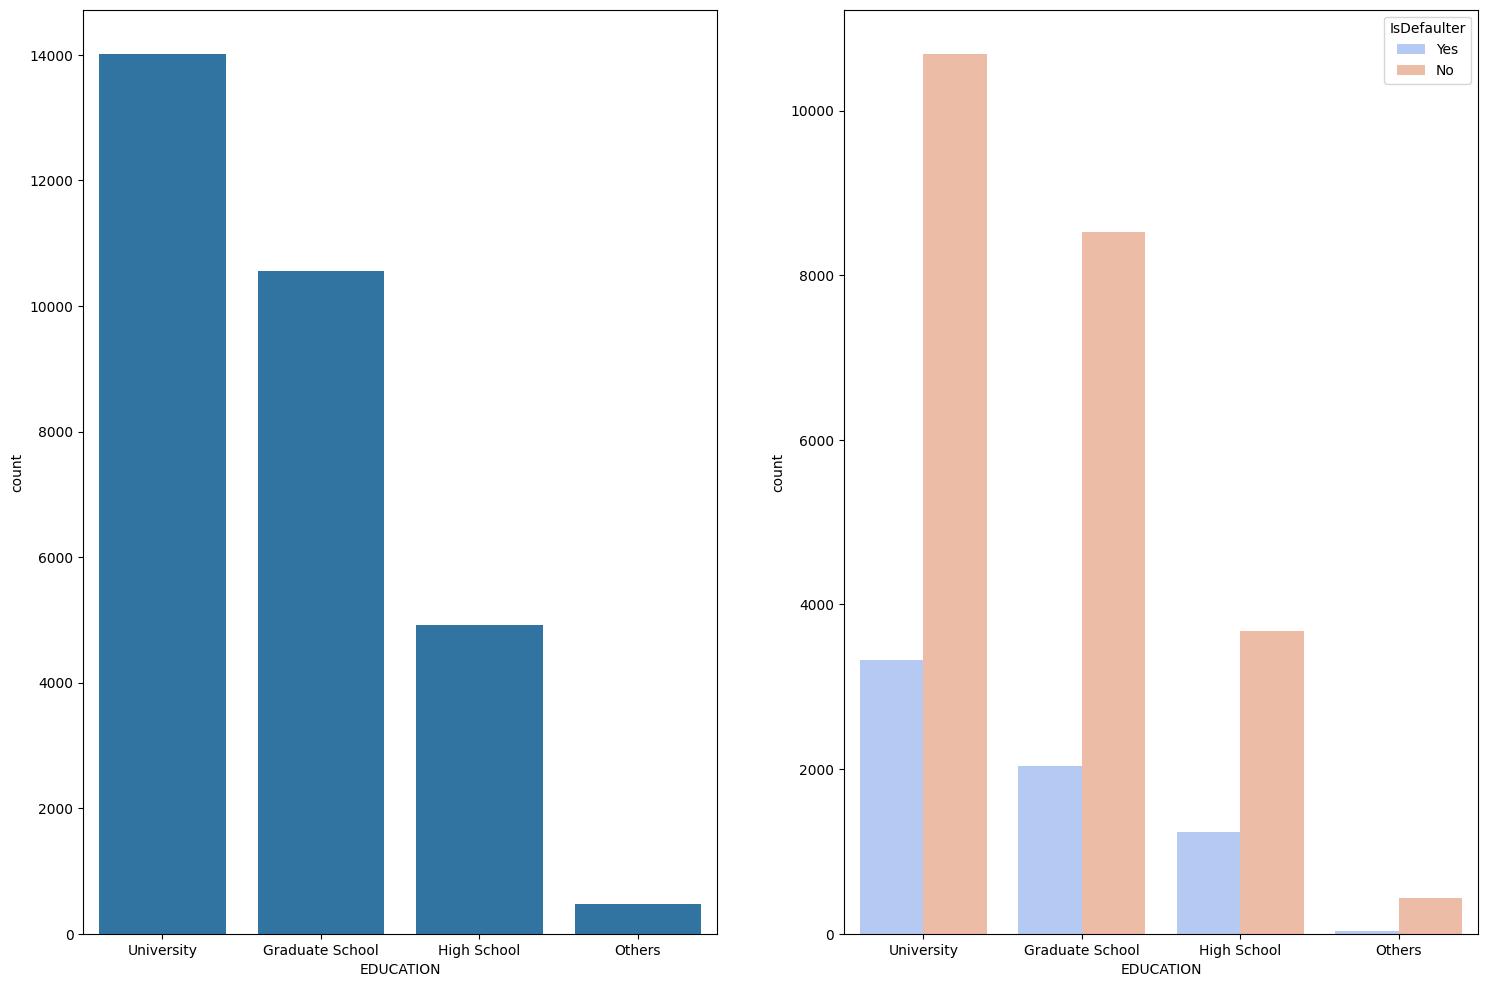

In [22]:
fig,axes = plt.subplots(ncols=2,figsize=(18,12))
sns.countplot(x="EDUCATION",ax = axes[0],data=df)
sns.countplot(x="EDUCATION",ax = axes[1],hue = "IsDefaulter",data = df,palette = "coolwarm")

#### Marriage 
Marital status (1=married, 2=single, 3=others)

In [23]:
df["MARRIAGE"].value_counts()
df["MARRIAGE"] = df["MARRIAGE"].replace({0:"Others"})
df["MARRIAGE"].value_counts()

MARRIAGE
Single     15945
Married    13643
Others       377
Name: count, dtype: int64

C:\Users\Akshat\AppData\Local\Temp\ipykernel_13468\2097976046.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "MARRIAGE",ax = axes[0], data =df,palette = "coolwarm")


<Axes: xlabel='MARRIAGE', ylabel='count'>

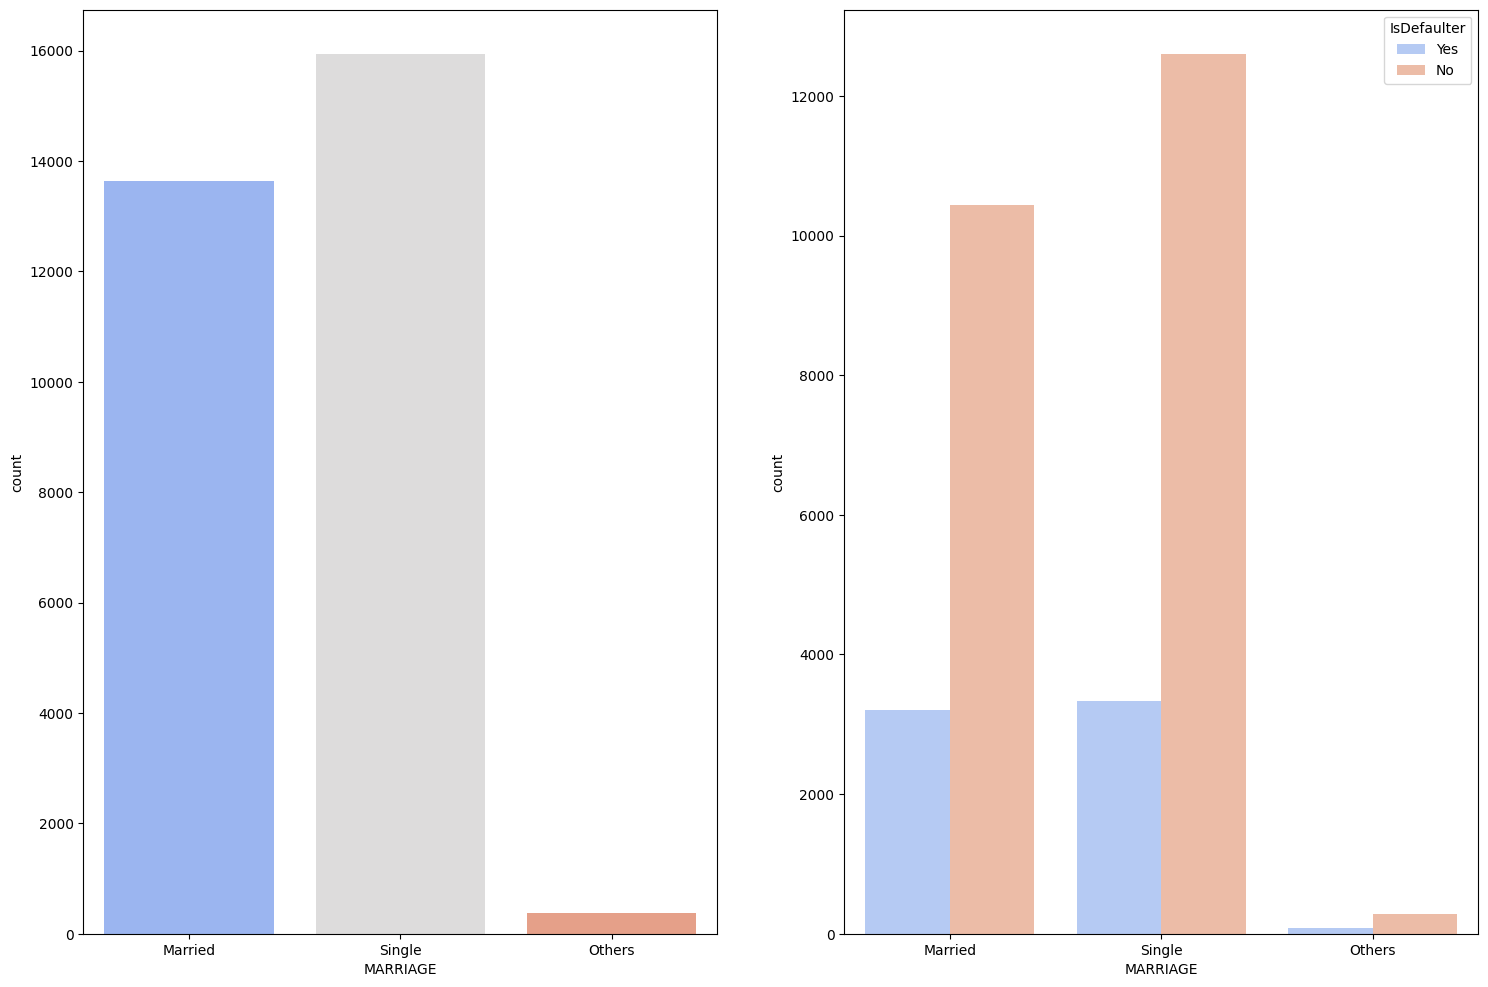

In [24]:
fig,axes = plt.subplots(ncols=2,figsize = (18,12))
sns.countplot(x = "MARRIAGE",ax = axes[0], data =df,palette = "coolwarm")
sns.countplot(x = "MARRIAGE", hue = "IsDefaulter", ax = axes[1],data = df,palette = "coolwarm")

## Continous Feature

### Age

In [25]:
df['AGE'].value_counts()

AGE
29    1602
27    1475
28    1406
30    1394
26    1252
31    1213
25    1185
34    1161
32    1157
33    1146
24    1126
35    1113
36    1107
37    1041
39     951
38     943
23     930
40     870
41     822
42     792
44     700
43     669
45     617
46     570
22     560
47     501
48     466
49     449
50     411
51     340
53     325
52     304
54     247
55     209
56     178
57     122
58     122
59      83
21      67
60      67
61      56
62      44
64      31
63      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
75       3
71       3
72       3
79       1
74       1
Name: count, dtype: int64

C:\Users\Akshat\AppData\Local\Temp\ipykernel_13468\3224283906.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'AGE', data = df,palette ="coolwarm")


<Axes: xlabel='AGE', ylabel='count'>

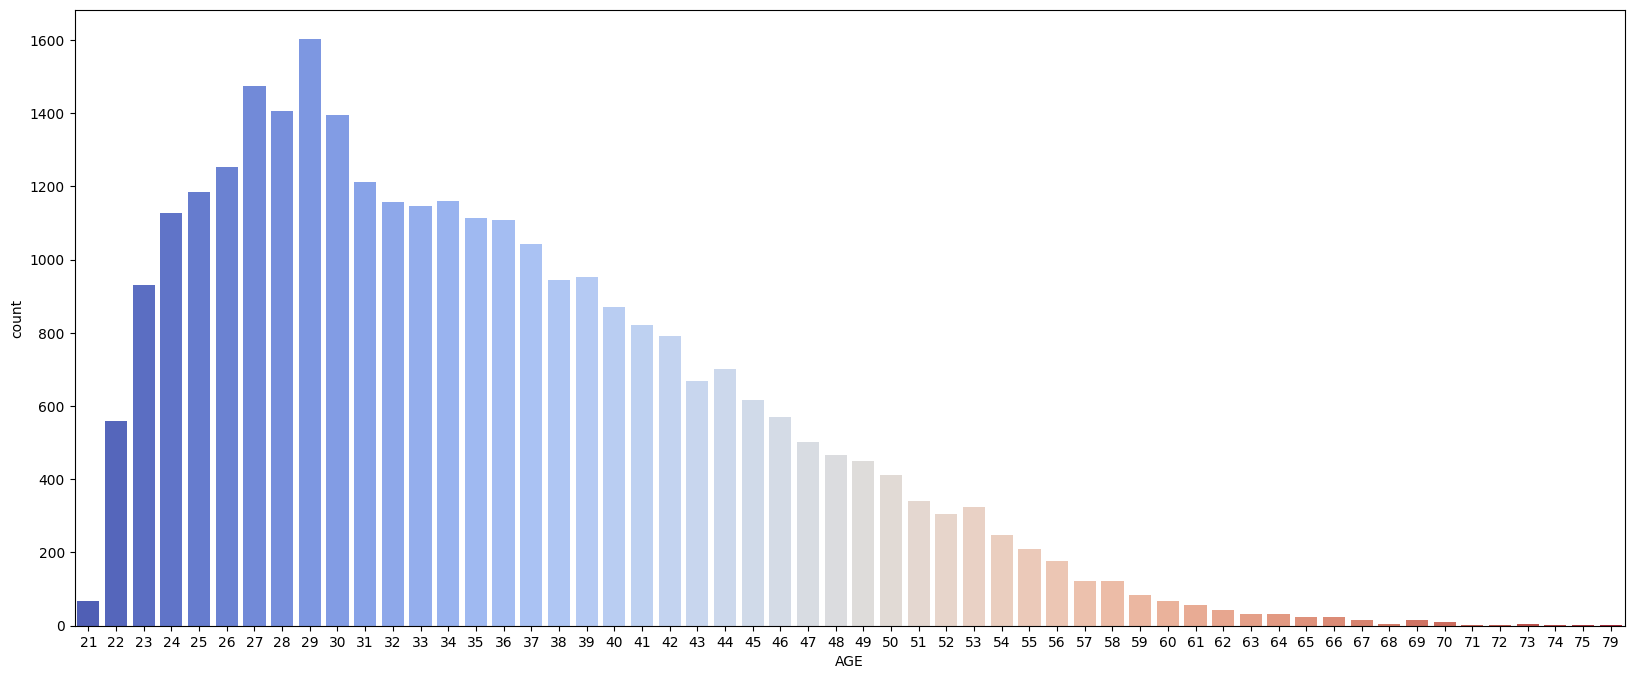

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = df,palette ="coolwarm")

<Axes: xlabel='AGE', ylabel='count'>

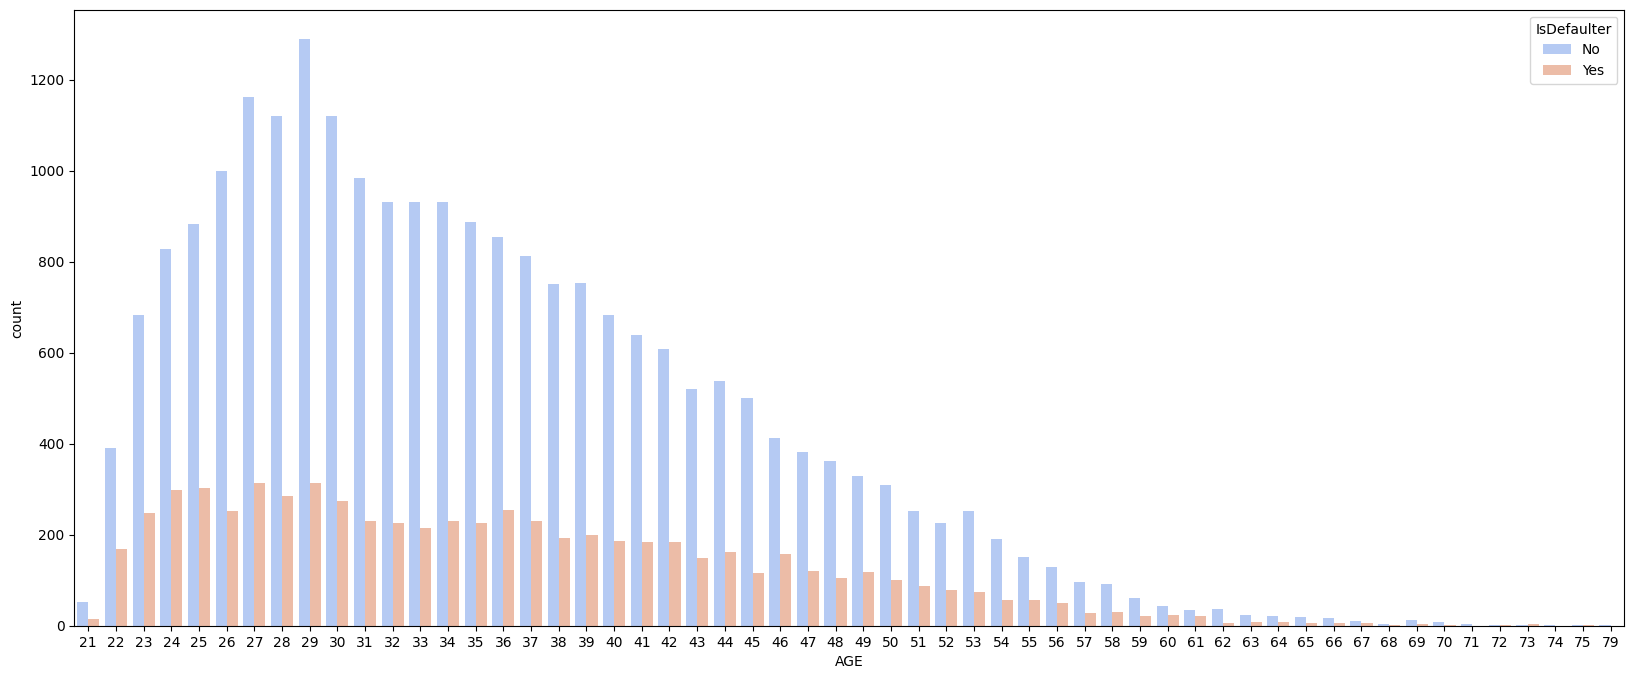

In [27]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = df,palette = "coolwarm")

In [28]:
# Converting back
#replacing values with labels
#replacing values with there labels
df.replace({'SEX': {'Male' : 1 ,'Female' : 2}}, inplace=True)
df.replace({'EDUCATION' : { 'Graduate School':1 ,'University' : 2,'High School' : 3,'Others' : 4}}, inplace=True)
df.replace({'MARRIAGE' : { 'Married' : 1,'Single' : 2,'Others' : 3}}, inplace = True)
df.replace({'IsDefaulter' : {'Yes':1, 'No':0}}, inplace = True)

C:\Users\Akshat\AppData\Local\Temp\ipykernel_13468\3922947151.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'SEX': {'Male' : 1 ,'Female' : 2}}, inplace=True)
C:\Users\Akshat\AppData\Local\Temp\ipykernel_13468\3922947151.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'EDUCATION' : { 'Graduate School':1 ,'University' : 2,'High School' : 3,'Others' : 4}}, inplace=True)
C:\Users\Akshat\AppData\Local\Temp\ipykernel_13468\3922947151.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated a

## Correlation

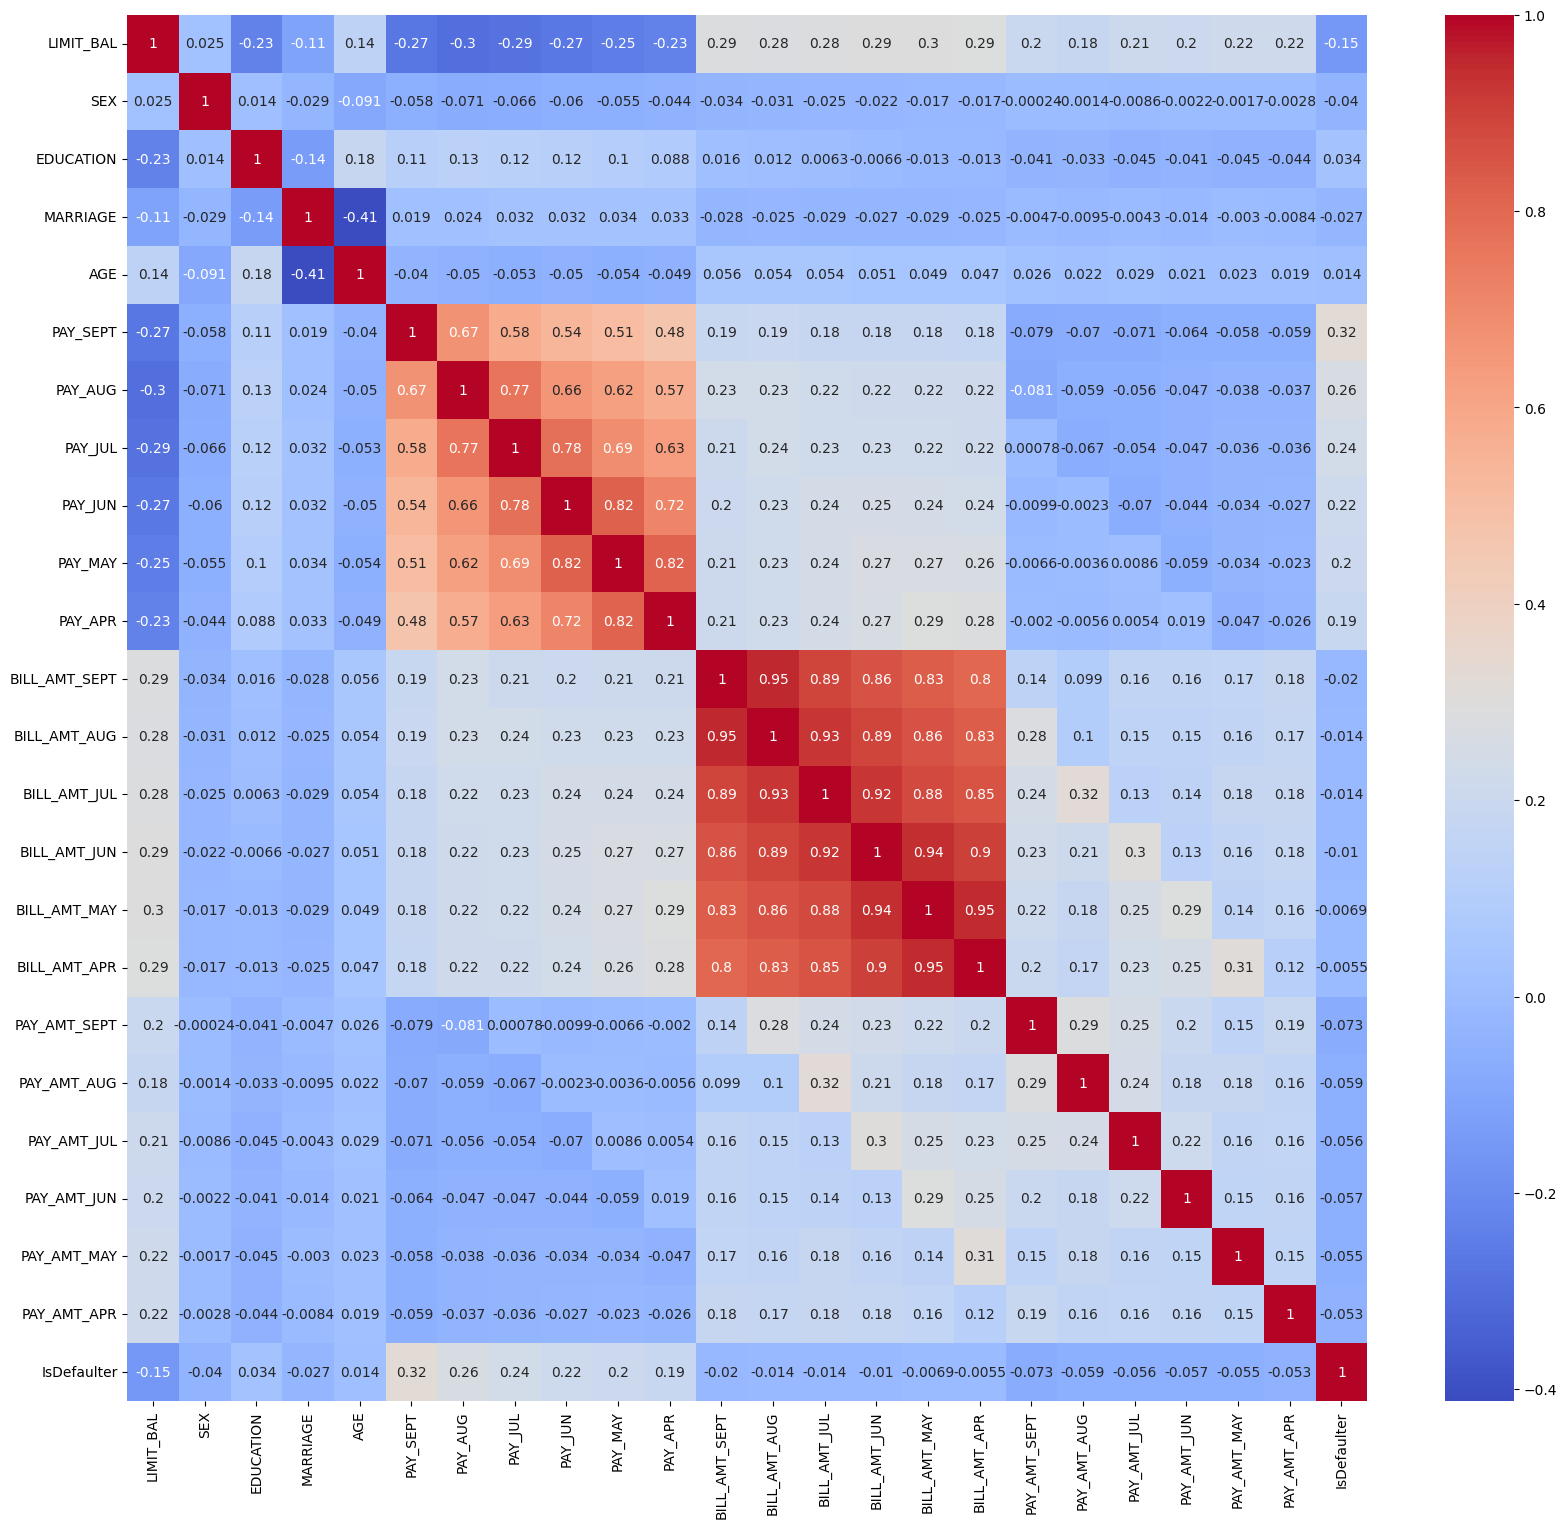

In [29]:

plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

We can conclude that BILL_AMT series and PAY_AMT series has sevior and medium ciorrelation hence it is not viable to use logistic regression for this or else we should do PCCA before operating logistic regression 

# Feature Enginerring 

Currently not implemented but for future we will include 
1. Average Repayment Status (Payment History)
2. Utilization Rate (Financial Strain)

In [30]:
# Derived Feature: AVG_REPAY_STATUS
# This feature is created by averaging the numerical codes from the six monthly repayment status columns, which serves as a single, powerful proxy for the customer's overall delinquency behavior.

pay_cols = ['PAY_SEPT',
 'PAY_AUG',
 'PAY_JUL',
 'PAY_JUN',
 'PAY_MAY',
 'PAY_APR']

# 2. Calculate the sum of all repayment status codes for each customer
df['Sum_Repay_Status'] = df[pay_cols].sum(axis=1)

# 3. Calculate the Average Repayment Status
df['AVG_REPAY_STATUS'] = df['Sum_Repay_Status'] / len(pay_cols)

# Display the first few rows of the new feature for verification
print(df[pay_cols + ['AVG_REPAY_STATUS']].head())

   PAY_SEPT  PAY_AUG  PAY_JUL  PAY_JUN  PAY_MAY  PAY_APR  AVG_REPAY_STATUS
0         2        2       -1       -1       -2       -2         -0.333333
1        -1        2        0        0        0        2          0.500000
2         0        0        0        0        0        0          0.000000
3         0        0        0        0        0        0          0.000000
4        -1        0       -1        0        0        0         -0.333333


In [31]:

# Derived Feature: AVG_REPAY_STATUSThe formula is:$$\text{AVG\_REPAY\_STATUS} = \frac{\sum \text{Repayment Status for Last 6 Months}}{\text{Number of Months (6)}}$$


bill_cols = ['BILL_AMT_SEPT',
 'BILL_AMT_AUG',
 'BILL_AMT_JUL',
 'BILL_AMT_JUN',
 'BILL_AMT_MAY',
 'BILL_AMT_APR',]

# 2. Calculate the sum of all bill amounts for the last six months
df['Total_Bill_Amount'] = df[bill_cols].sum(axis=1)

# 3. Calculate the Average Utilization Rate
df['AVG_UTIL_RATE'] = df['Total_Bill_Amount'] / (df['LIMIT_BAL'] * 6 + 1e-6)

# Display the first few rows of the new feature for verification
print(df[['LIMIT_BAL', 'Total_Bill_Amount', 'AVG_UTIL_RATE']].head())

   LIMIT_BAL  Total_Bill_Amount  AVG_UTIL_RATE
0    20000.0             7704.0       0.064200
1   120000.0            17077.0       0.023718
2    90000.0           101653.0       0.188246
3    50000.0           231334.0       0.771113
4    50000.0           109339.0       0.364463


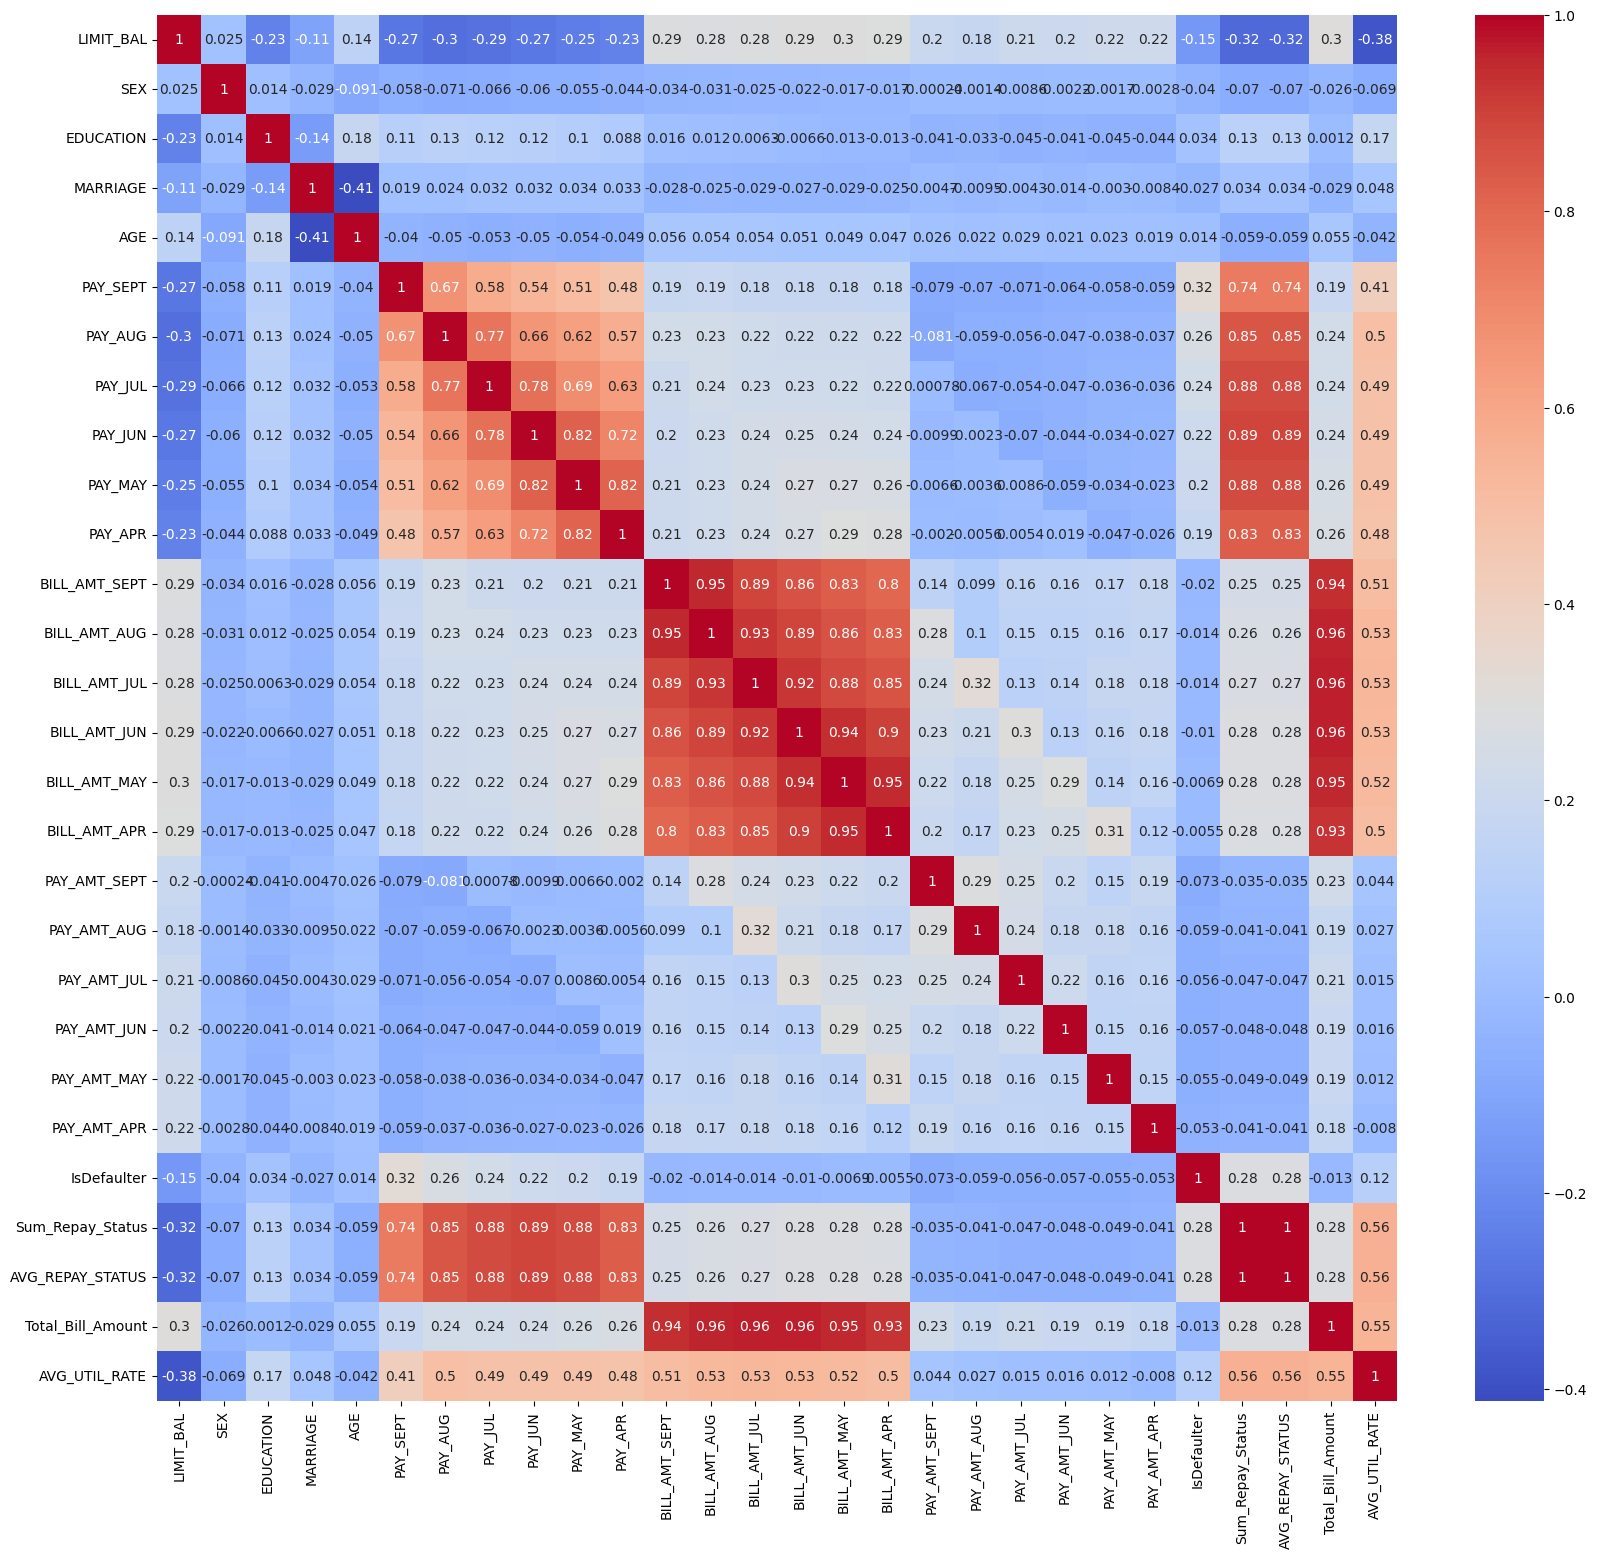

In [32]:
# Heatamp after feature engineering 
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

# One Hot Encoding

In [33]:
df.shape

(29965, 28)

In [34]:
#Creating dummy variable
df = pd.get_dummies(df,columns=["EDUCATION","MARRIAGE"],drop_first = True)

In [35]:
df.shape

(29965, 31)

In [36]:
df = pd.get_dummies(df , columns = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN',
       'PAY_MAY', 'PAY_APR'],drop_first = True)

In [37]:
df.shape

(29965, 83)

# SMOT

In [38]:
col_x = df.drop(["IsDefaulter"],axis=1).columns
col_y = "IsDefaulter"

In [39]:

from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_smote,y_smote = smote.fit_resample(df[col_x],df[col_y])


In [40]:
print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(X_smote))

Original unbalanced dataset shape 29965
Resampled balanced dataset shape 46670


In [41]:
balanced_df = pd.DataFrame(X_smote,columns=X_smote.columns)

In [42]:
balanced_df

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000.000000,2,24,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
1,120000.000000,2,26,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,...,False,False,False,True,False,False,False,False,False,False
2,90000.000000,2,34,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,...,False,False,True,False,False,False,False,False,False,False
3,50000.000000,2,37,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,...,False,False,True,False,False,False,False,False,False,False
4,50000.000000,1,57,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46665,153612.282890,1,32,134062.562800,71195.523898,-16318.373421,-29862.756337,-29862.756337,-29862.756337,3605.747886,...,False,False,False,False,False,False,False,False,False,False
46666,360000.000000,1,31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
46667,20000.000000,1,34,17642.795546,16899.351293,17898.276083,18857.043599,18809.569916,19418.486453,575.910930,...,False,False,True,False,False,False,False,False,False,False
46668,226912.277224,2,32,35270.350495,37144.787721,35002.859604,35880.554614,37347.235783,36941.313348,2561.689939,...,False,False,False,True,False,False,False,False,False,False


In [43]:
balanced_df["IsDefaulter"] = y_smote

In [44]:
balanced_df.T

,0,1,2,3,4,5,6,7,8,9,...,46660,46661,46662,46663,46664,46665,46666,46667,46668,46669
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0,50000.0,500000.0,100000.0,140000.0,20000.0,...,100000.0,360000.0,300781.861473,300000.0,180000.0,153612.28289,360000.0,20000.0,226912.277224,20000.0
SEX,2,2,2,2,1,1,1,2,2,1,...,1,1,1,2,2,1,1,1,2,1
AGE,24,26,34,37,57,37,29,23,28,35,...,37,28,42,32,28,32,31,34,32,23
BILL_AMT_SEPT,3913.0,2682.0,29239.0,46990.0,8617.0,64400.0,367965.0,11876.0,11285.0,0.0,...,32201.416009,0.0,304473.401432,0.0,7697.553487,134062.5628,0.0,17642.795546,35270.350495,6011.269459
BILL_AMT_AUG,3102.0,1725.0,14027.0,48233.0,5670.0,57069.0,412023.0,380.0,14096.0,0.0,...,34554.393491,0.0,300405.315944,0.0,15468.88415,71195.523898,0.0,16899.351293,37144.787721,7014.697221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PAY_APR_5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PAY_APR_6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PAY_APR_7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PAY_APR_8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


C:\Users\Akshat\AppData\Local\Temp\ipykernel_13468\3338194187.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="IsDefaulter",data = balanced_df,palette="coolwarm")


<Axes: xlabel='IsDefaulter', ylabel='count'>

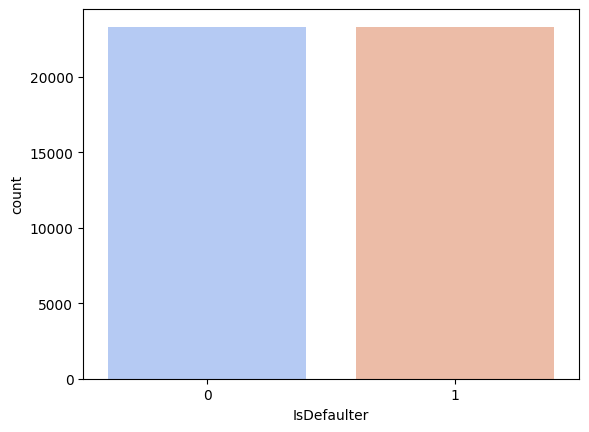

In [45]:
sns.countplot(x="IsDefaulter",data = balanced_df,palette="coolwarm")

We can see the balanced dependent variable after the smote

# Splitting X and Y

In [46]:
balanced_df.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,IsDefaulter
0,20000.0,2,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,1
1,120000.0,2,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,False,False,True,False,False,False,False,False,False,1
2,90000.0,2,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,False,True,False,False,False,False,False,False,False,0
3,50000.0,2,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,False,True,False,False,False,False,False,False,False,0
4,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,False,True,False,False,False,False,False,False,False,0


In [47]:
balanced_df.shape

(46670, 83)

In [48]:
X = balanced_df.drop(["IsDefaulter"],axis=1)
y = balanced_df["IsDefaulter"]

# Data Transformation 

In [49]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

# Train Test Split

In [50]:
from sklearn.model_selection import train_test_split
X_train , X_test  , y_train , y_test = train_test_split(X, y, test_size=0.2)

In [51]:
print(f"X_train shape-{X_train.shape}")
print(f"X_test shape-{X_test.shape}")

X_train shape-(37336, 82)
X_test shape-(9334, 82)


In [52]:
print(f"y_train shape-{y_train.shape}")
print(f"y_test shape-{y_test.shape}")

y_train shape-(37336,)
y_test shape-(9334,)


# Model Training

## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score , roc_auc_score , confusion_matrix , roc_curve, auc

In [54]:
#fitting data into Logistic Regression
logi = LogisticRegression(fit_intercept=True, max_iter=10000)
logi.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [55]:
y_pred_logi = logi.predict(X_test)
y_train_pred_logi = logi.predict(X_train)

In [56]:
#getting all score for logistic regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 3)
roc_score_logi = round(roc_auc_score(y_pred_logi,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.849
The accuracy on test data is  0.851
The precision on test data is  0.769
The recall on test data is  0.92
The f1 on test data is  0.838
The roc_score on test data is  0.861


[[4361  312]
 [1076 3585]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

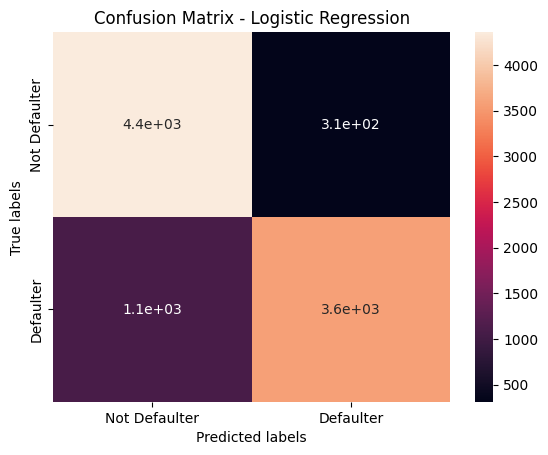

In [57]:
#Confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm_logi = confusion_matrix(y_test, y_pred_logi )
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [58]:
import pickle
with open("logi","wb") as file:
    pickle.dump(logi,file)

## Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(X_train, y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
y_pred_rfc = rfc.predict(X_test)
y_train_pred_rfc = rfc.predict(X_train)

In [62]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  0.999
The accuracy on test data is  0.866
The precision on test data is  0.832
The recall on test data is  0.893
The f1 on test data is  0.861
The roc_score on test data is  0.868


[[4211  462]
 [ 785 3876]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

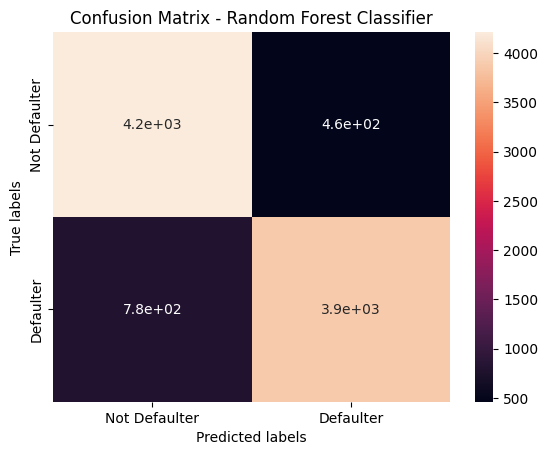

In [63]:
# Get the confusion matrix for Random Forest Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [64]:
with open("rfc.pkl","wb") as file:
    pickle.dump(rfc,file)

## Random Forest

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
gbc = GradientBoostingClassifier(random_state = 42)
gbc.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [67]:
y_pred_gbc = gbc.predict(X_test)
y_train_pred_gbc = gbc.predict(X_train)

In [68]:
#getting all scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train), 3)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test), 3)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test), 3)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test), 3)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test), 3)
roc_score_gbc = round(roc_auc_score(y_pred_gbc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  0.84
The accuracy on test data is  0.839
The precision on test data is  0.785
The recall on test data is  0.88
The f1 on test data is  0.83
The roc_score on test data is  0.843


[[4174  499]
 [1001 3660]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

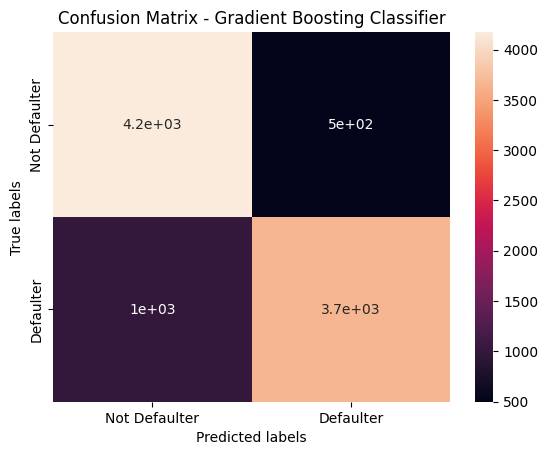

In [69]:
# Get the confusion matrix for Gradient Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_gbc = confusion_matrix(y_test, y_pred_gbc )
print(cm_gbc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_gbc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Gradient Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [70]:
import pickle
with open("gbc","wb") as file:
    pickle.dump(gbc,file)

## SVM

In [71]:
from sklearn.svm import SVC

In [72]:
svm=SVC(probability=True)
svm.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [73]:
#class prediction of y
y_pred_svm=svm.predict(X_test)
y_train_pred_svm=svm.predict(X_train)

In [75]:

#getting all scores for Support Vector Classifier
train_accuracy_svm = round(accuracy_score(y_train_pred_svm,y_train), 3)
accuracy_svm = round(accuracy_score(y_pred_svm,y_test), 3)
precision_score_svm = round(precision_score(y_pred_svm,y_test), 3)
recall_score_svm = round(recall_score(y_pred_svm,y_test), 3)
f1_score_svm = round(f1_score(y_pred_svm,y_test), 3)
roc_score_svm = round(roc_auc_score(y_pred_svm,y_test), 3)

print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", accuracy_svm)
print("The precision on test data is ", precision_score_svm)
print("The recall on test data is ", recall_score_svm)
print("The f1 on test data is ", f1_score_svm)
print("The roc_score on test data is ", roc_score_svm)

The accuracy on train data is  0.855
The accuracy on test data is  0.854
The precision on test data is  0.775
The recall on test data is  0.92
The f1 on test data is  0.841
The roc_score on test data is  0.863


[[4357  316]
 [1051 3610]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

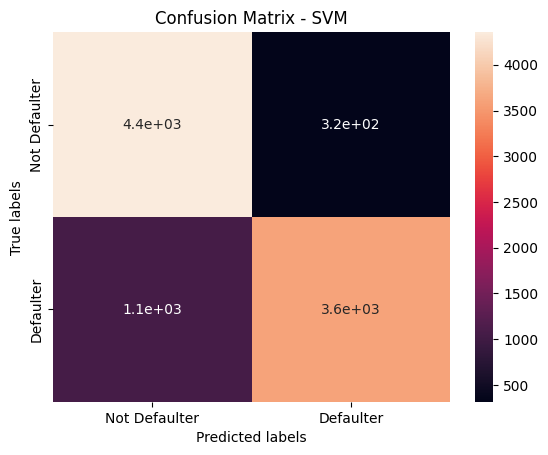

In [76]:

# Get the confusion matrix for Support Vector Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_svm = confusion_matrix(y_test, y_pred_svm )
print(cm_svm)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - SVM')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [83]:
import pickle
with open("svm","wb") as file:
    pickle.dump(svm,file)

# Model evaluation

In [77]:
all_lassifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
all_train_accuracy = [train_accuracy_logi, train_accuracy_rfc, train_accuracy_svm, train_accuracy_gbc]
all_test_accuracy = [accuracy_logi, accuracy_rfc, accuracy_svm, accuracy_gbc]
all_precision_score = [precision_score_logi, precision_score_rfc, precision_score_svm, precision_score_gbc]
all_recall_score = [recall_score_logi, recall_score_rfc, recall_score_svm, recall_score_gbc]
all_f1_score = [f1_score_logi, f1_score_rfc, f1_score_svm, f1_score_gbc]
all_auc_score = [roc_score_logi, roc_score_rfc, roc_score_svm, roc_score_gbc]

In [78]:
compare_df = pd.DataFrame({'Classifier':all_lassifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})

In [79]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
1,Decision Tree,0.999,0.866,0.832,0.893,0.861,0.868
2,Random Forest,0.855,0.854,0.775,0.920,0.841,0.863
0,Logistic Regression,0.849,0.851,0.769,0.920,0.838,0.861
3,SVM,0.840,0.839,0.785,0.880,0.830,0.843


In [80]:
#importing roc curve
from sklearn.metrics import roc_curve

In [81]:
#probabilty prediction of y for all model
y_pred_proba_logi = logi.predict_proba(X_test)[:,1]
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
y_pred_proba_svm = svm.predict_proba(X_test)[:,1]
y_pred_proba_gbc = gbc.predict_proba(X_test)[:,1]

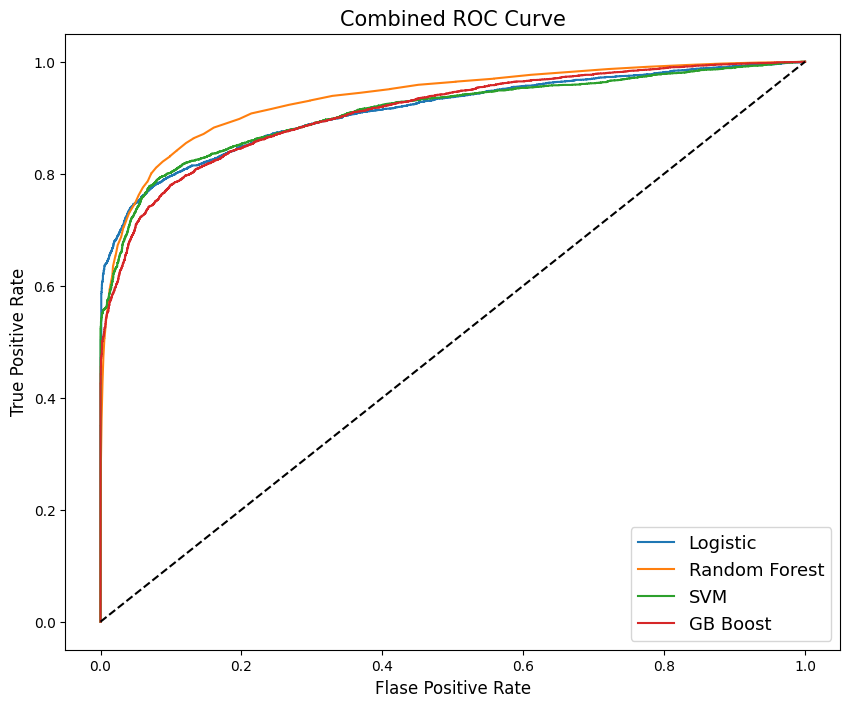

In [82]:
fig = plt.figure(figsize=(10,8)) 

fpr_logi, tpr_logi, _logi = roc_curve(y_test,  y_pred_proba_logi)
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rfc)
fpr_svm, tpr_svm, _svm = roc_curve(y_test,  y_pred_proba_svm)
fpr_gbc, tpr_gbc, _gbc = roc_curve(y_test,  y_pred_proba_gbc)

plt.plot(fpr_logi, tpr_logi)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_svm, tpr_svm)
plt.plot(fpr_gbc, tpr_gbc)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("Flase Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Logistic", "Random Forest", "SVM", "GB Boost"], prop={'size':13}, loc='lower right' )